# <span style="color:#ffa500">10 | DATA VISUALIZATION</span>

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">This chapter of an Introduction to Health Data Science</span> by <span property="cc:attributionName">Dr JH Klopper</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-nd/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-NonCommercial-NoDerivatives 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nd.svg?ref=chooser-v1"></a></p>

## <span style="color:#0096FF">Introduction</span>

Data visualization is a critical tool in the world of data science, as it allows for the intuitive understanding and interpretation of complex data. Turning abstract numbers into visual representations, allows for the identifictaion of patterns, trends, and outliers, for making comparisons, and understanding the structure of data. Data visualization augments the understadnong of data learned from descriptive statistics, and is a key component of exploratory data analysis.

The power of data visualization lies in its ability to provide a clear, easily digestible view of data. It enables both technical and non-technical stakeholders to understand and engage with the data, making it a crucial tool for data-driven decision making in healthcare.

This chapter explores various types of data visualizations, from basic plots like bar charts, line graphs, and scatter plots, to more complex visualizations like heatmaps, and box plots.

There are many data visualization packages in Python, including matplotlib, seaborn, altair, plotly, and many more. Seaborn is introduced below. Seaborn is a package built on matplotlib and automates many of the code that is required for statistical plots.

## <span style="color:#0096FF">Packages used in this chapter</span>

The following packages are used in this notebook. Note that no namespace abbreviations are used. This is a stylistic and grammatical choice.

In [1]:
import pandas
import seaborn
from matplotlib import pyplot

The `config` magic command is used to set high resolution figures.

In [2]:
%config InlineBackend.figure_format = 'retina'

There are various plotting themes available in the seaborn package. Themes create an overall look to plot. More about the `set_style` function can be found [here](https://seaborn.pydata.org/generated/seaborn.set_theme.html). The `style` argument of the `set_style` function is set to `'whitegrid'` below.

In [3]:
seaborn.set_style(style='whitegrid')

## <span style="color:#0096FF">Data import</span>

The `heart_failure.csv` spreadsheet file in comma-separated values format is used again in this chapter. It is imported as a pandas dataframe object using the `read_csv` function and assigned to the variable `df`.

In [4]:
# Import spreadhseet file and assign it to the variable df
df = pandas.read_csv('https://raw.githubusercontent.com/juanklopper/TutorialData/main/heart_failure.csv')

The column headers (variables) are listed using the `columns` attribute.

In [5]:
# Columns in the data file
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'hypertension', 'platelets', 'serum_creatinine',
       'serum_sodium', 'sex', 'smoking', 'time', 'death'],
      dtype='object')

Plots are selected based on the data type of the variable(s) that are to be visualized. The seaborn package divides its high-level plots into three categories, shown in the image below.

![](seaborn_structure.png)

## <span style="color:#0096FF">Relational plots</span>

Relational plots visualize the correlation between continuous variables.

The seaborn package lists scatter plots and line plots as relational plots. In the figure below, the `scatterplot` function is used to create a scatter plot of the `age` vs. `platelets` variables to visualize the correlation between these two continuous variables.

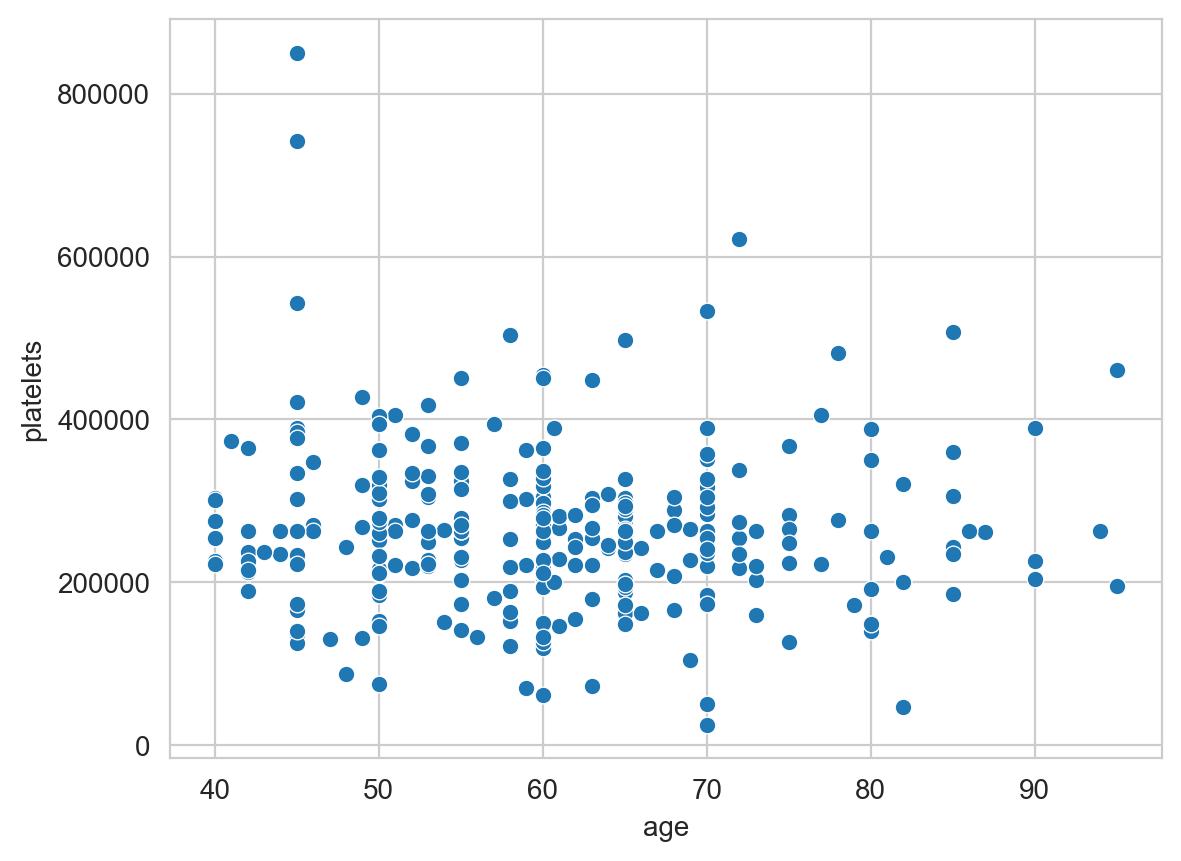

In [6]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets'
);

The correlation between continuous variables can be visualized by the unique elements of a categorical variable. The `hue` argument can be set to a categorical variable. Each class (unique element) for the categorical variable is colored differently. The `style` argument can also be used and set to the name of the categorical variable. This adds more visual contrast, by using different marker styles for each class of the categorical variable. In the figure below both arguments are used and the values are set to the `anaemia` variable. Note the use of the `set` method after the plot is created. The `set` method is used to set the title and axes labels of the plot using the `title`, `xlabel`, and `ylabel` arguments.

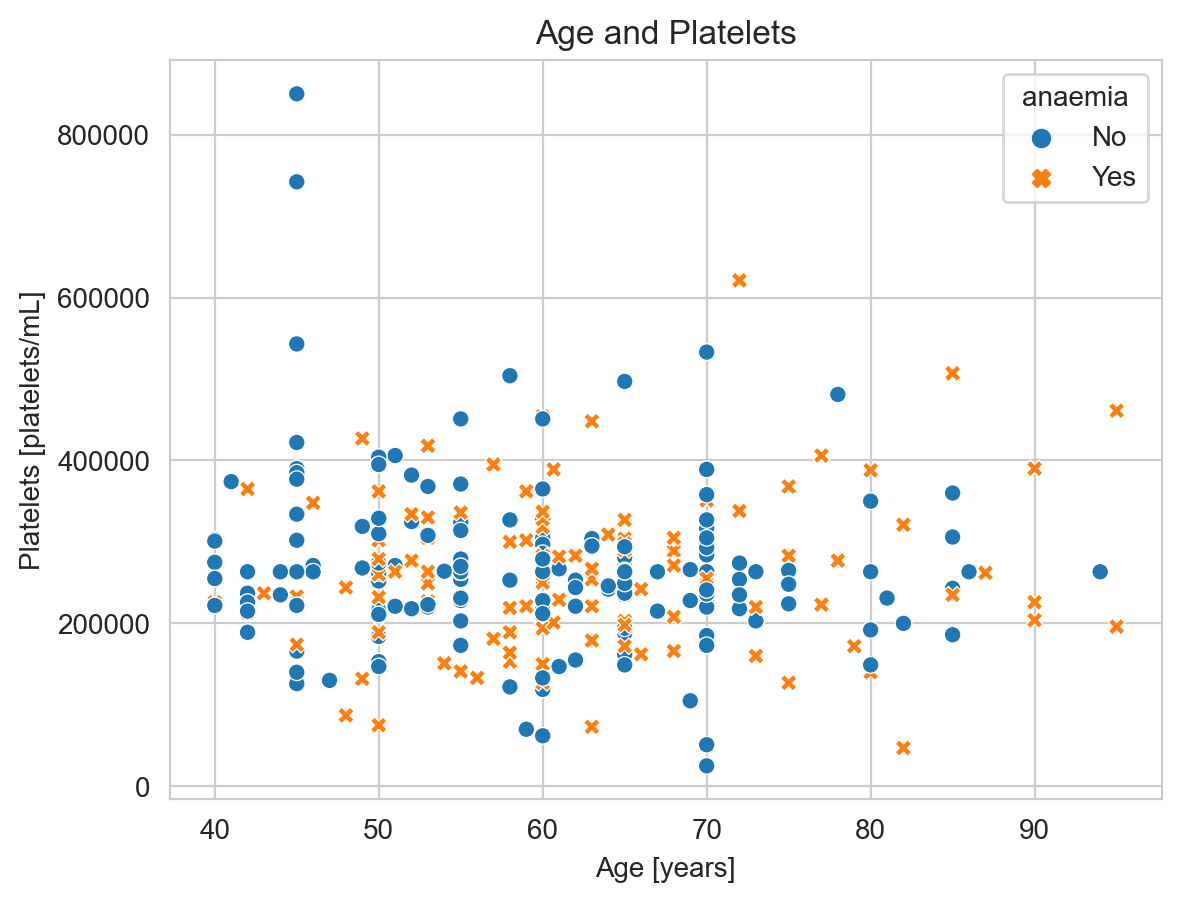

In [7]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    hue='anaemia',
    style='anaemia'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
);

<span style="color:#00FF00">Task</span>

Create a scatter plot to visualize the correlation between the `platelets` and `serum_sodium` variables, colored by the unique elements (classes or levels) of the `diabetes` variable. Add an appropriate title and axes labels.

<span style="color:#00FF00">Solution</span>

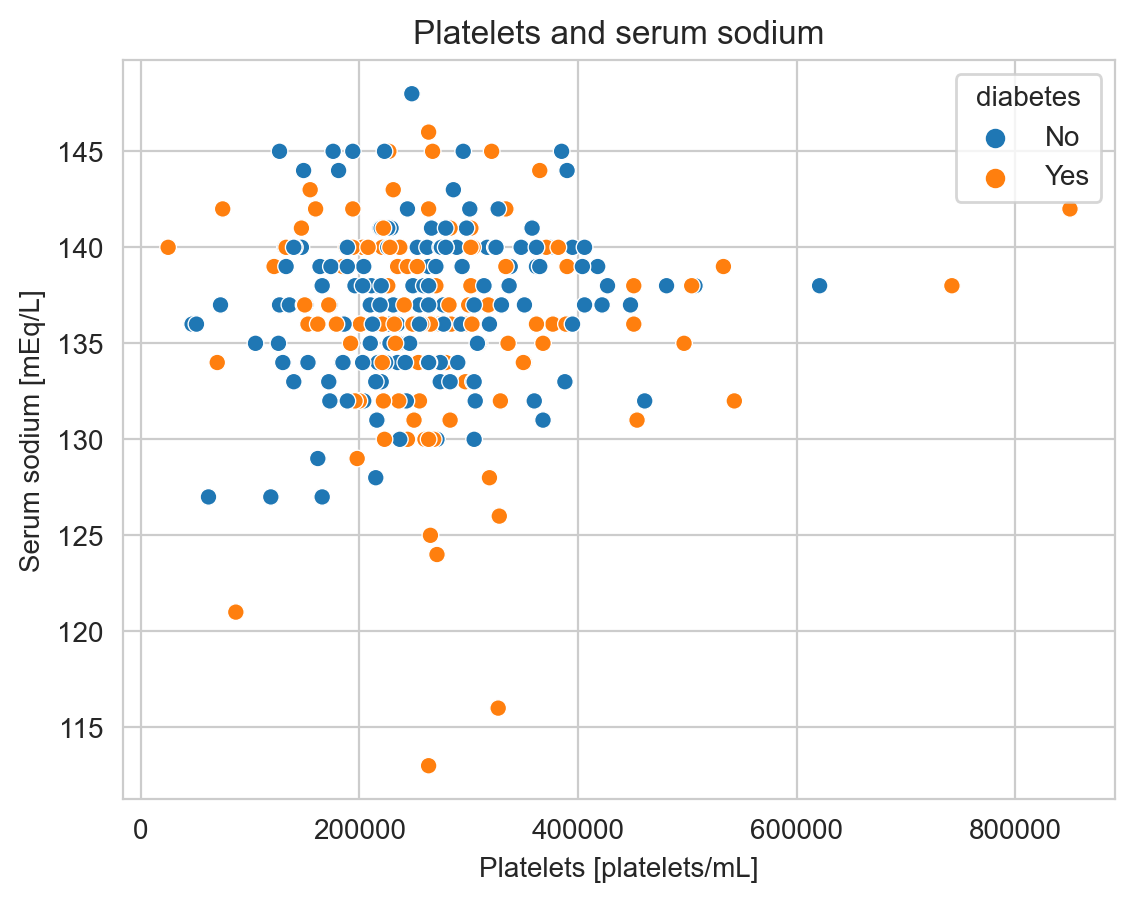

In [8]:
seaborn.scatterplot(
    data=df,
    x='platelets',
    y='serum_sodium',
    hue='diabetes'
).set(
    title='Platelets and serum sodium',
    xlabel='Platelets [platelets/mL]',
    ylabel='Serum sodium [mEq/L]'
);

Instead of using the classes of a categorical variable, a third continuous variable can be visualized using the `hue` argument. When the variable is continuous, the value determines the color of the markers. In the figure below, the values of the `serum_sodium` variable is used. To change the legend title from `serum_sodium` to `Serum sodium [mEq/mL]`, the `legend` function from the pyplot module is required. The `title` argumet is set appropriately.

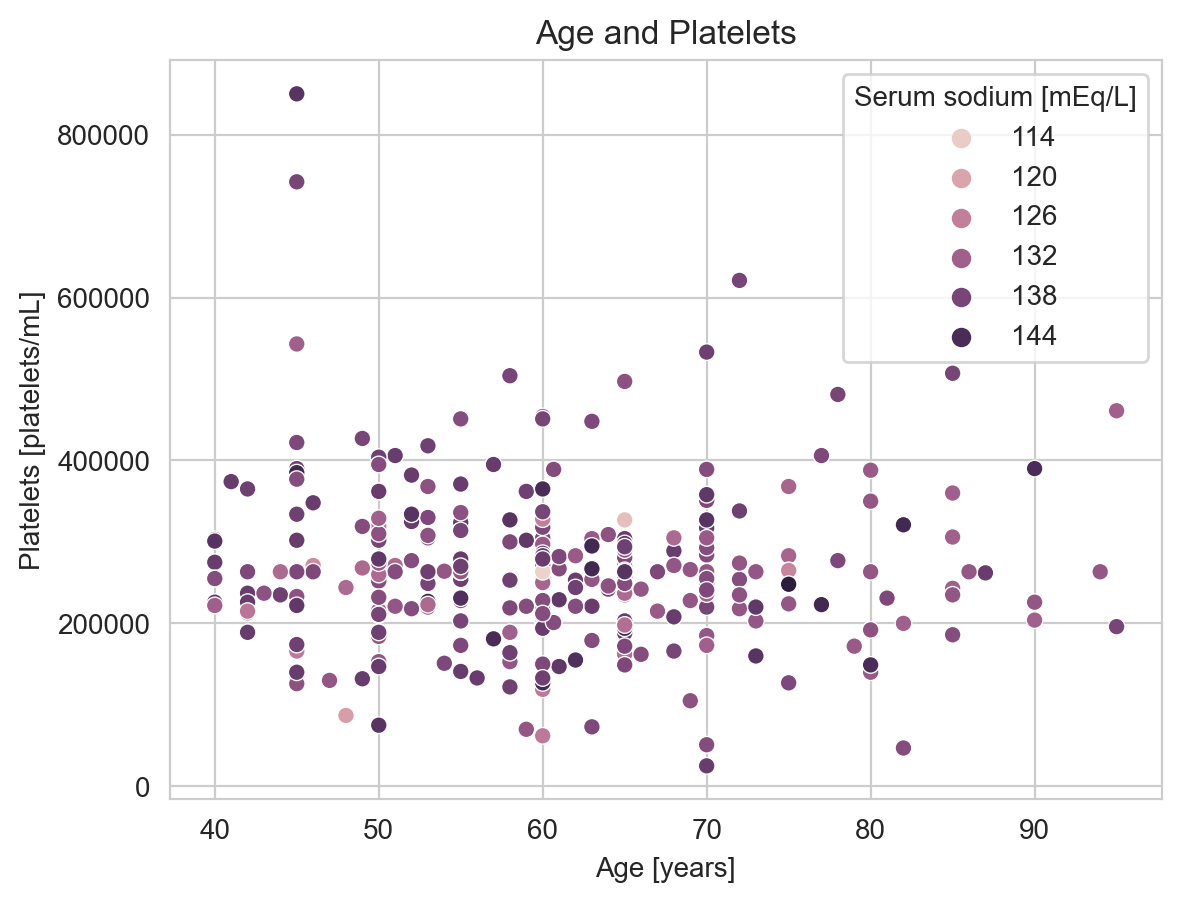

In [9]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    hue='serum_sodium'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
)

pyplot.legend(
    title='Serum sodium [mEq/L]',
);

The `size` argument uses marker size instead of color to visualize a third continuous variable. In the figure below, the `size` argument is sued instead of the `hue` argument for the `serum_sodium` variable.

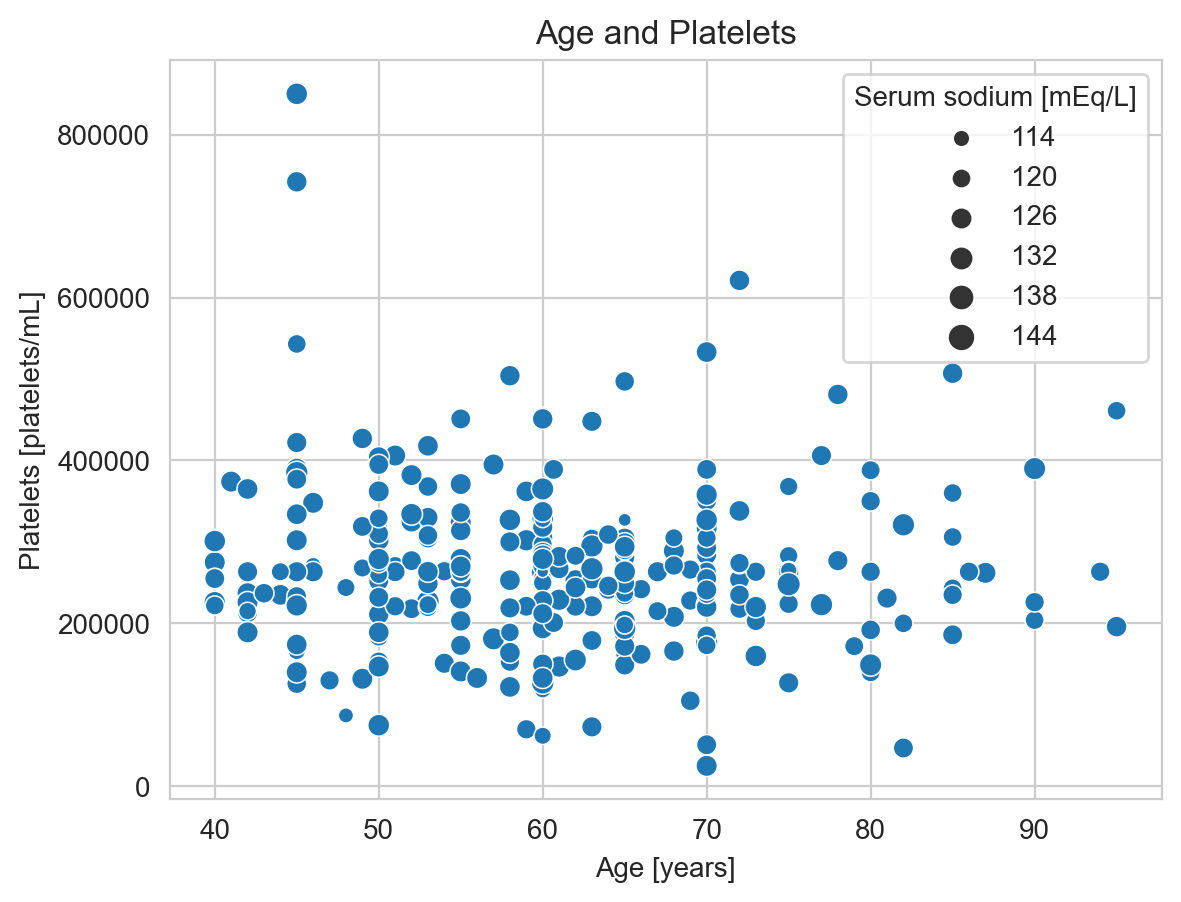

In [10]:
seaborn.scatterplot(
    data=df,
    x='age',
    y='platelets',
    size='serum_sodium'
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
)

pyplot.legend(
    title='Serum sodium [mEq/L]'
);

## <span style="color:#0096FF">Distribution plots</span>

Histograms can be used to visualize the frequency of numerical data type values. A histogram generates intervals (bins) and counts the occurrences of continuous values in each interval.

The `displot` function can produce a histogram. In the figure below, a default histogram of the `age` variable is created.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


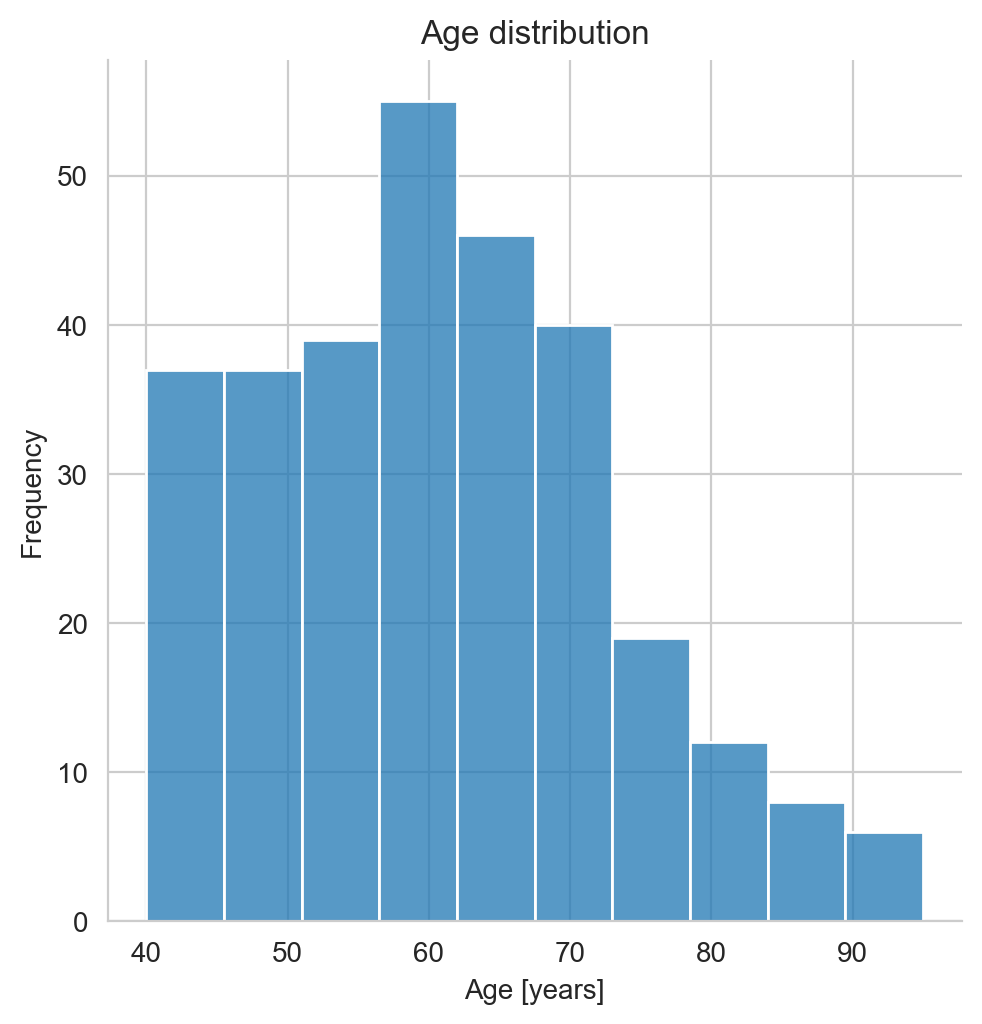

In [11]:
seaborn.displot(
    df,
    x='age'
).set(
    title='Age distribution',
    xlabel='Age [years]',
    ylabel='Frequency'
);

The bin intervals are specified in the plot below, using the `range` function. The start value is $40$, the end values is $110$, and the step size is $10$. This will produce a histogram along the `age` decades, which is more user-friendly to view.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


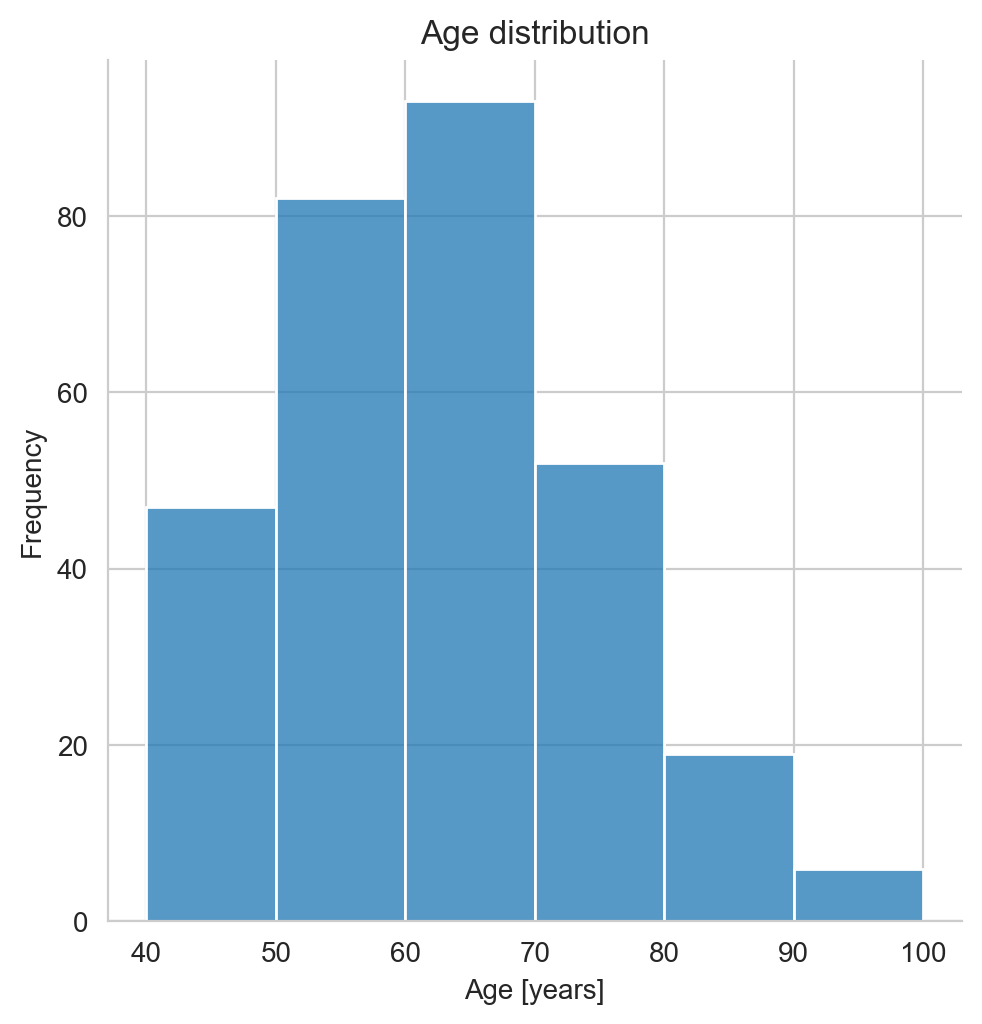

In [12]:
seaborn.displot(
    df,
    x='age',
    bins=range(40, 110, 10)
).set(
    title='Age distribution',
    xlabel='Age [years]',
    ylabel='Frequency'
);

<span style="color:#00FF00">Task</span>

Generate a histogram to visualize the distribution of the `platelets` variable. Calculate the minimum and the maximum value for the variable and use the `range` function to create a intervals of $50000$. Note that the ticks value on the horizontal axis seems _overcrowded_. Try to use the argument `y` instead of `x`. This will create a horizontal histogram, with more space for the tick values.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


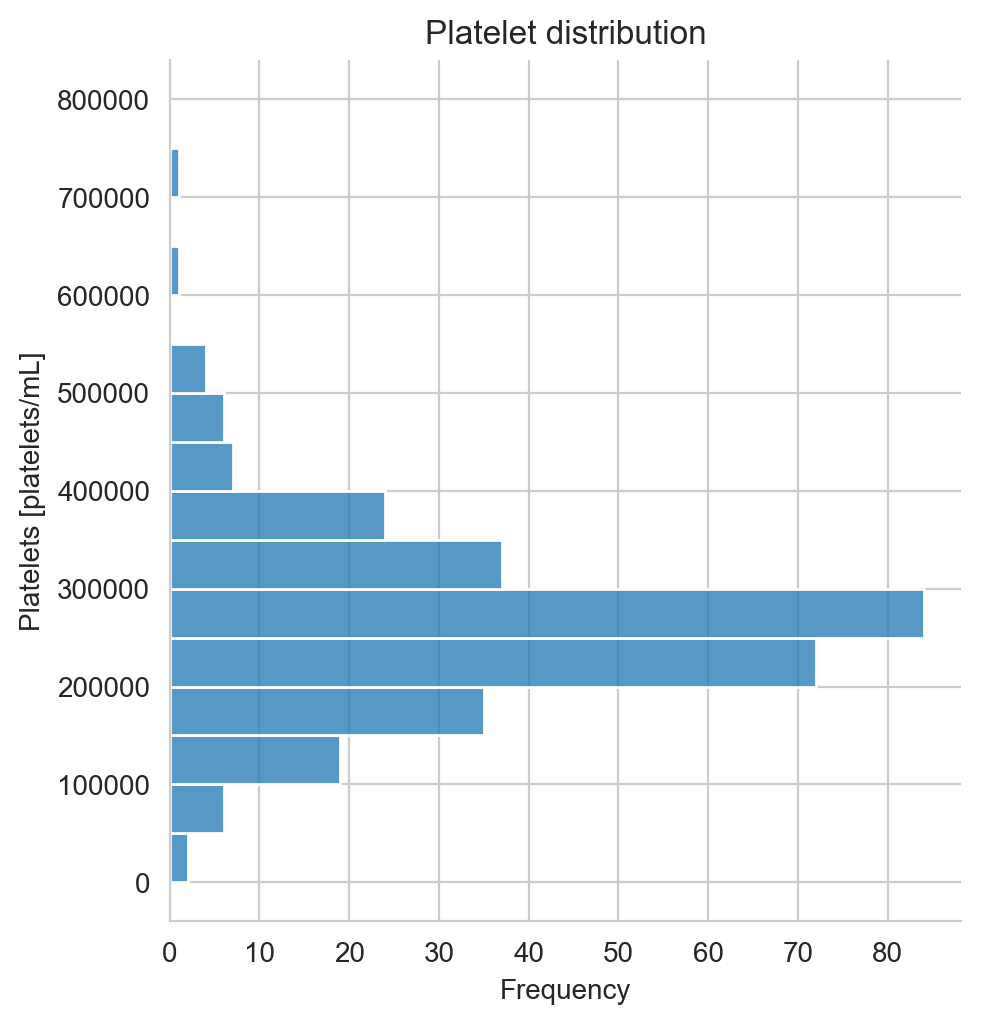

In [13]:
df.platelets.min()

df.platelets.max()

seaborn.displot(
    df,
    y='platelets',
    bins=range(0, 850000,50000)
).set(
    title='Platelet distribution',
    ylabel='Platelets [platelets/mL]',
    xlabel='Frequency'
);

The figure below shows a histogram for each of the classes in the `anaemia` variable using the `hue` argument.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


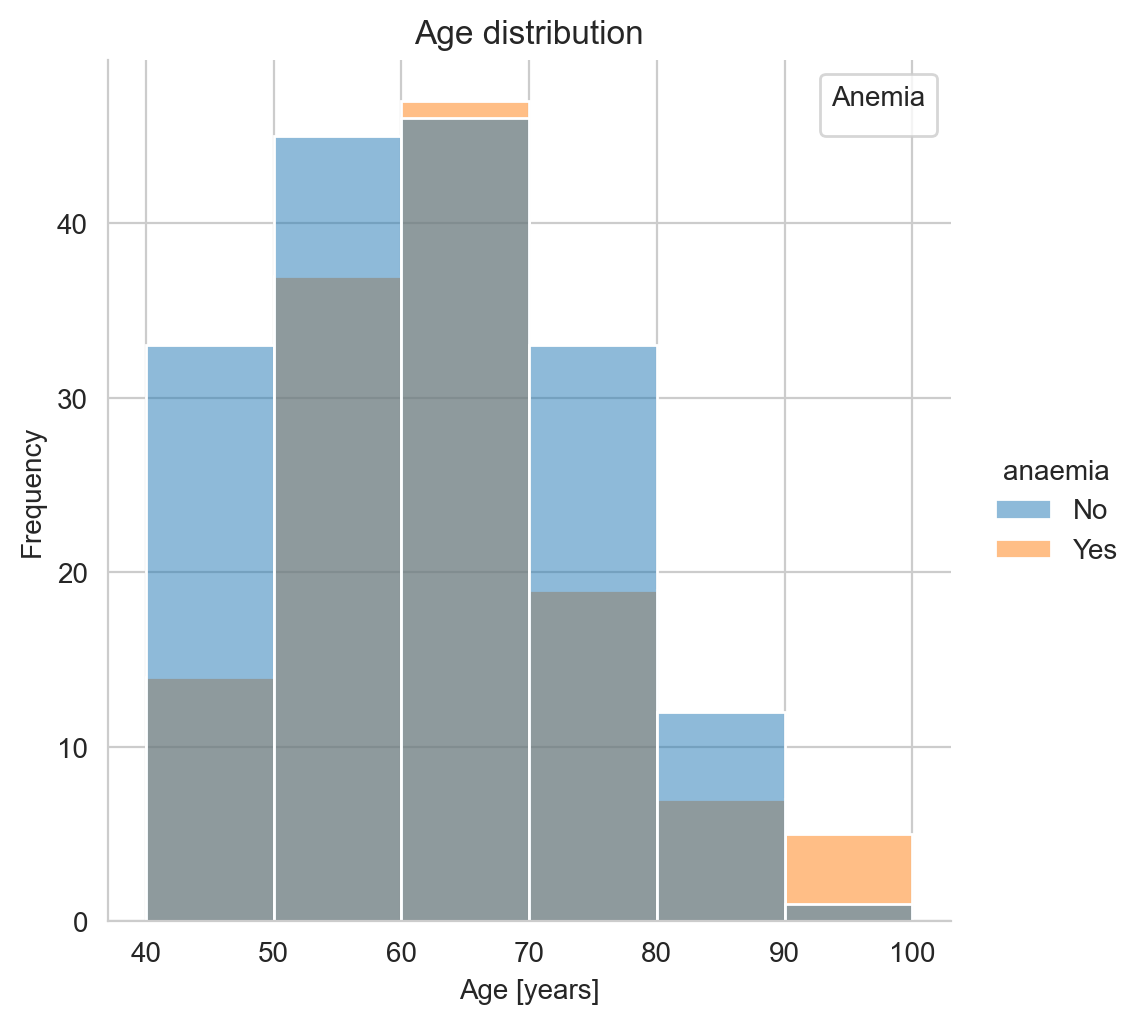

In [14]:
seaborn.displot(
    df,
    x='age',
    bins=range(40, 110, 10),
    hue='anaemia'
).set(
    title='Age distribution',
    xlabel='Age [years]',
    ylabel='Frequency'
)

pyplot.legend(
    title='Anemia'
);

Overlaying histograms can be difficult to visualize. For interest in the combined frequency, the `multiple` argument is set to `'stack'` to produce a stacked histogram, shown in the figure below.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


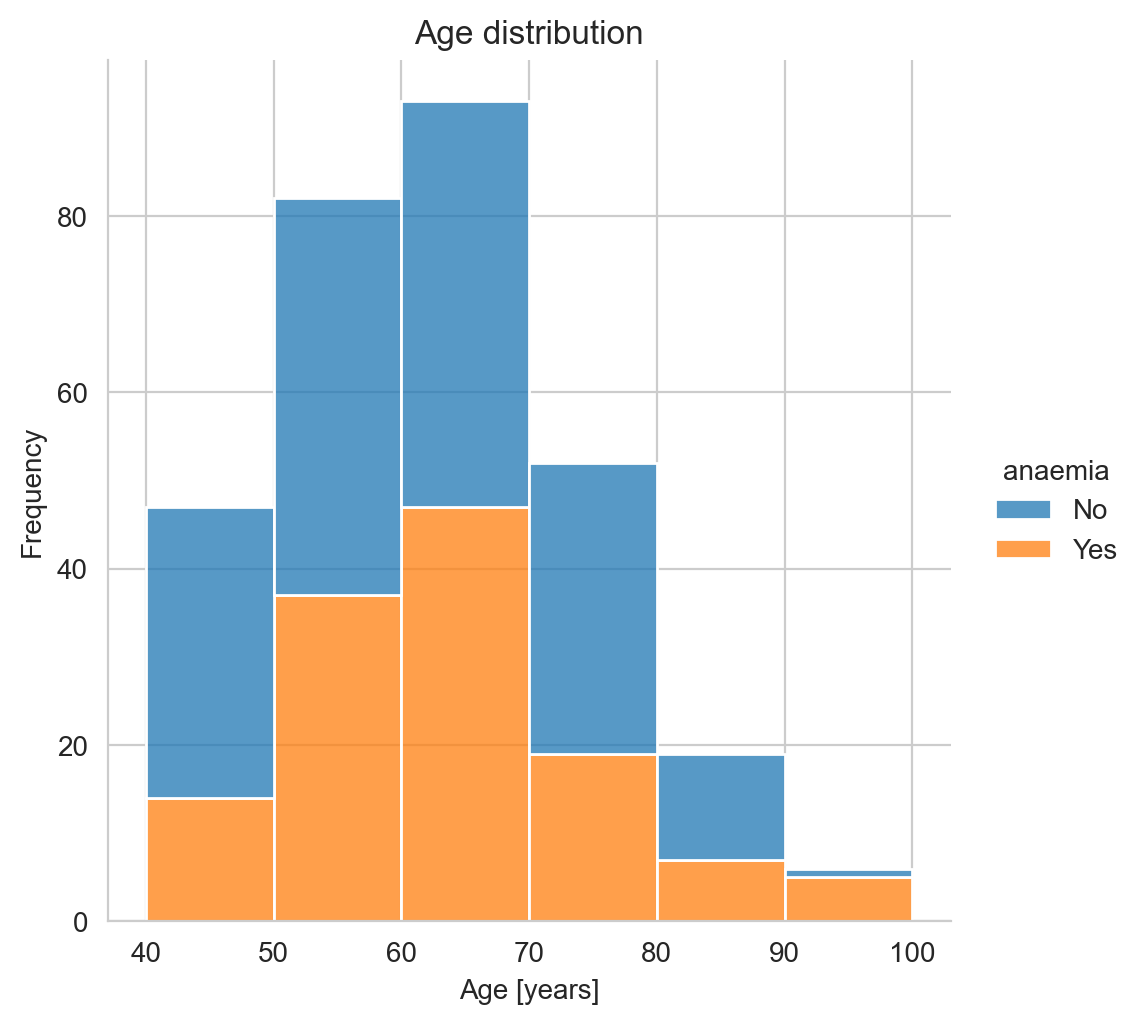

In [15]:
seaborn.displot(
    df,
    x='age',
    bins=range(40, 110, 10),
    hue='anaemia',
    multiple='stack'
).set(
    title='Age distribution',
    xlabel='Age [years]',
    ylabel='Frequency'
);

It may be better to produce separate histograms for each of the classes. This is achieved using the `col` argument. In the figure below, two separate histograms (for each class of the `anaemmia` variable classes is used.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


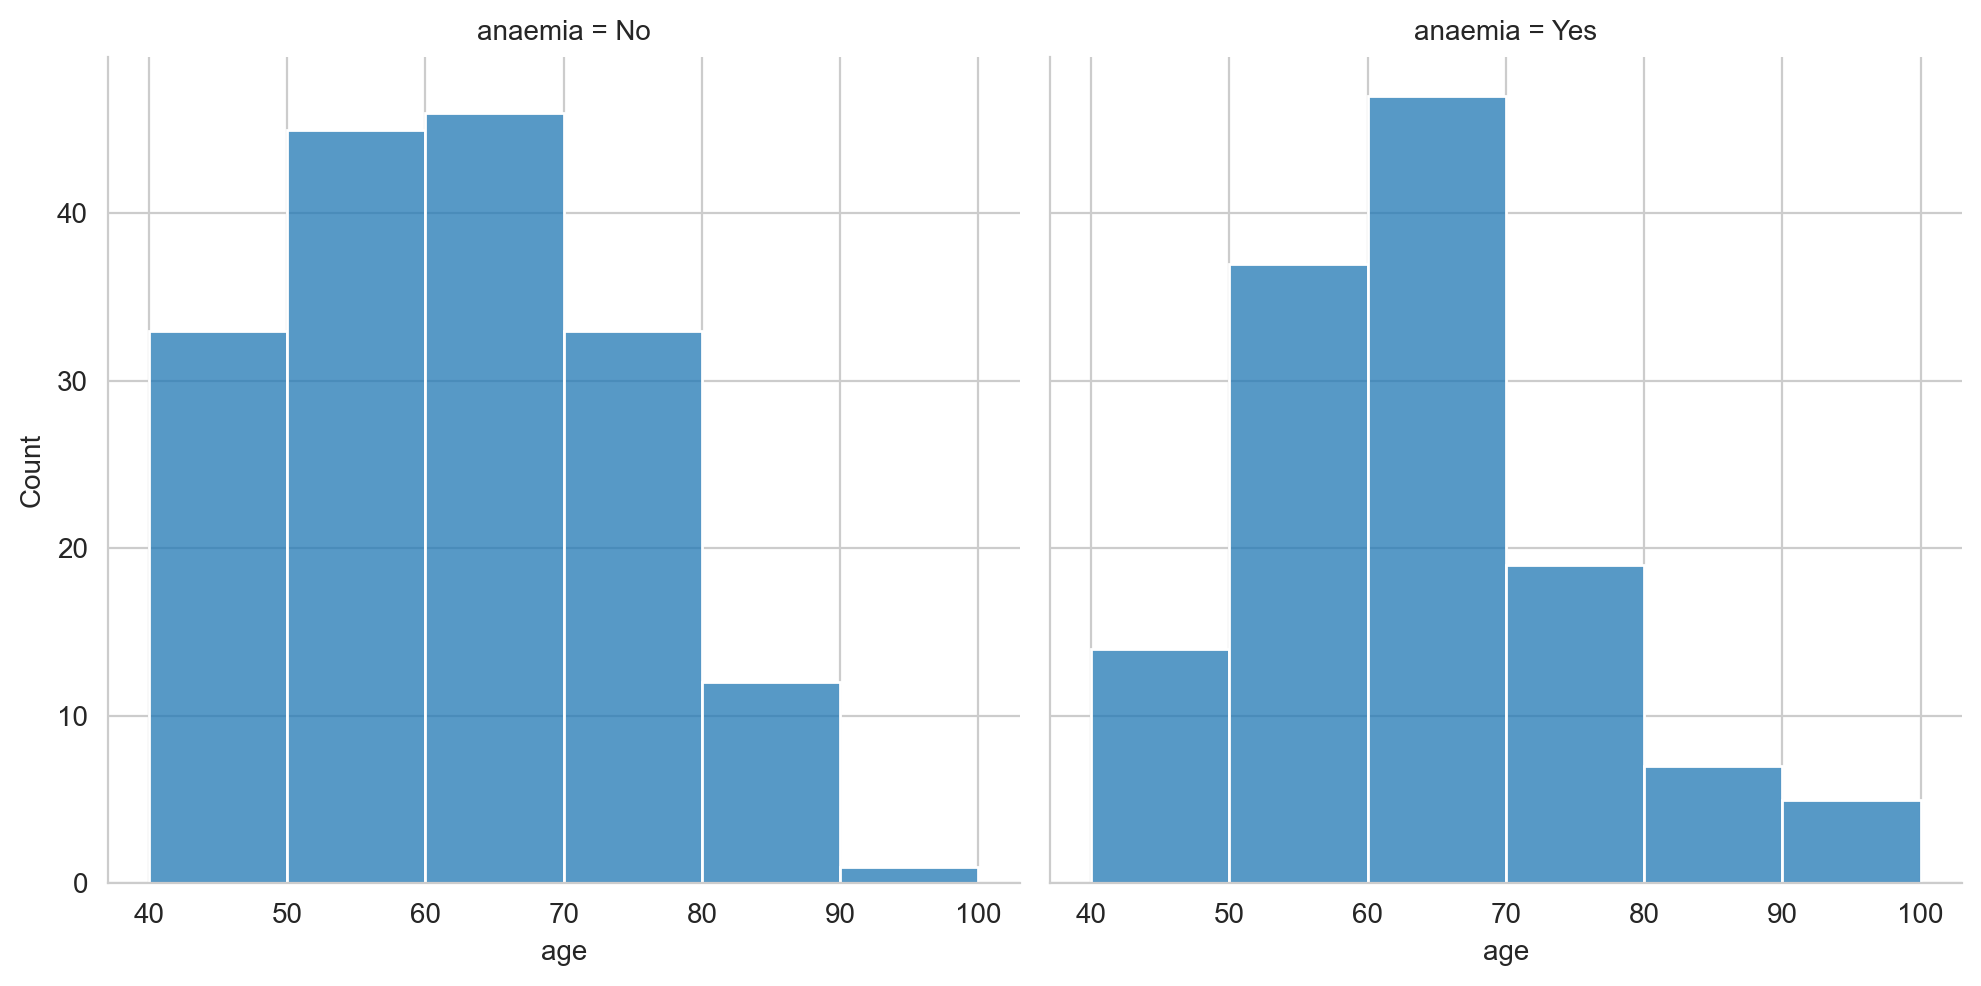

In [16]:
seaborn.displot(
    df,
    x='age',
    bins=range(40, 110, 10),
    col='anaemia'
);

The `stat` argument can be set to `probability` to visualize the relative frequency instead of the frequency. In the figure below, the relative frequency version of the figure above is visualized.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


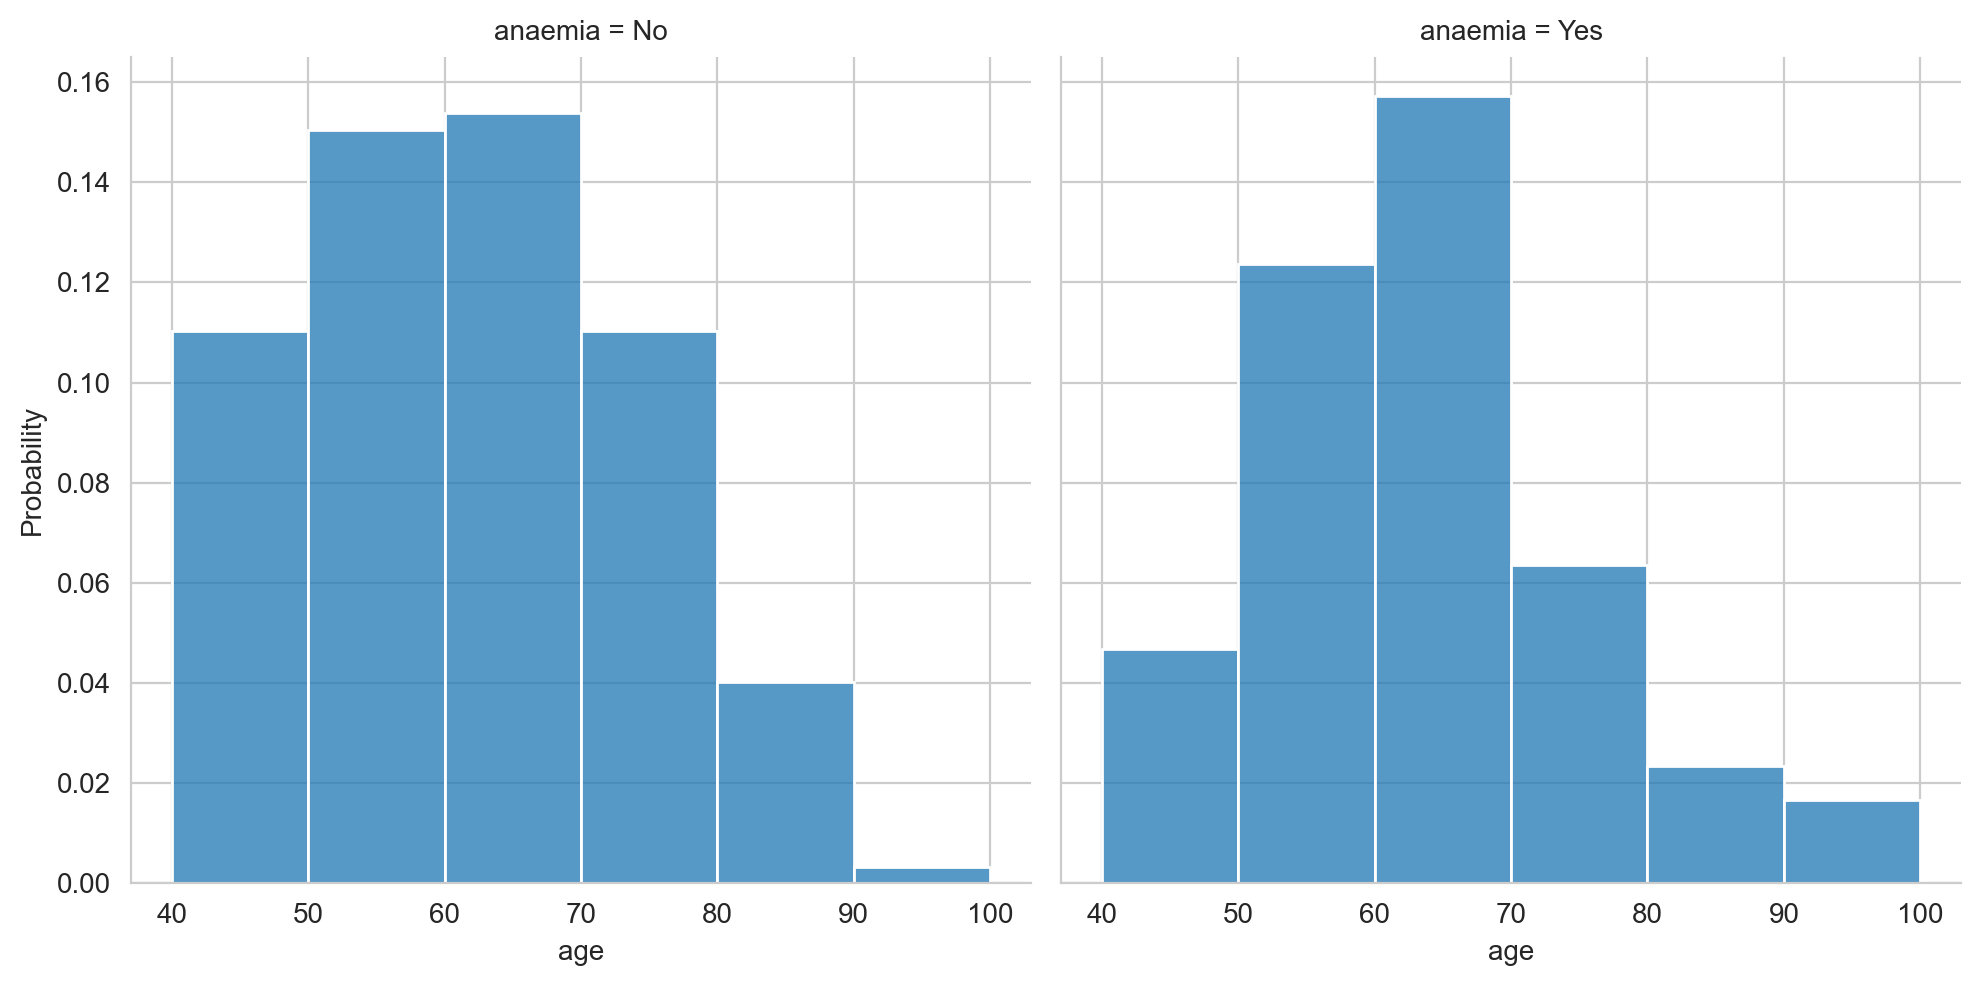

In [17]:
seaborn.displot(
    df,
    x='age',
    bins=range(40, 110, 10),
    col='anaemia',
    stat='probability'
);

Heat maps can be used to visualize the distribution of two continuous variables. A `y` argument is added to the `displot` function to visualize bivariate distributions. In the figure below, the `age` and the `platelets` variables are visualized. The `cbar` argument adds a color bar.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


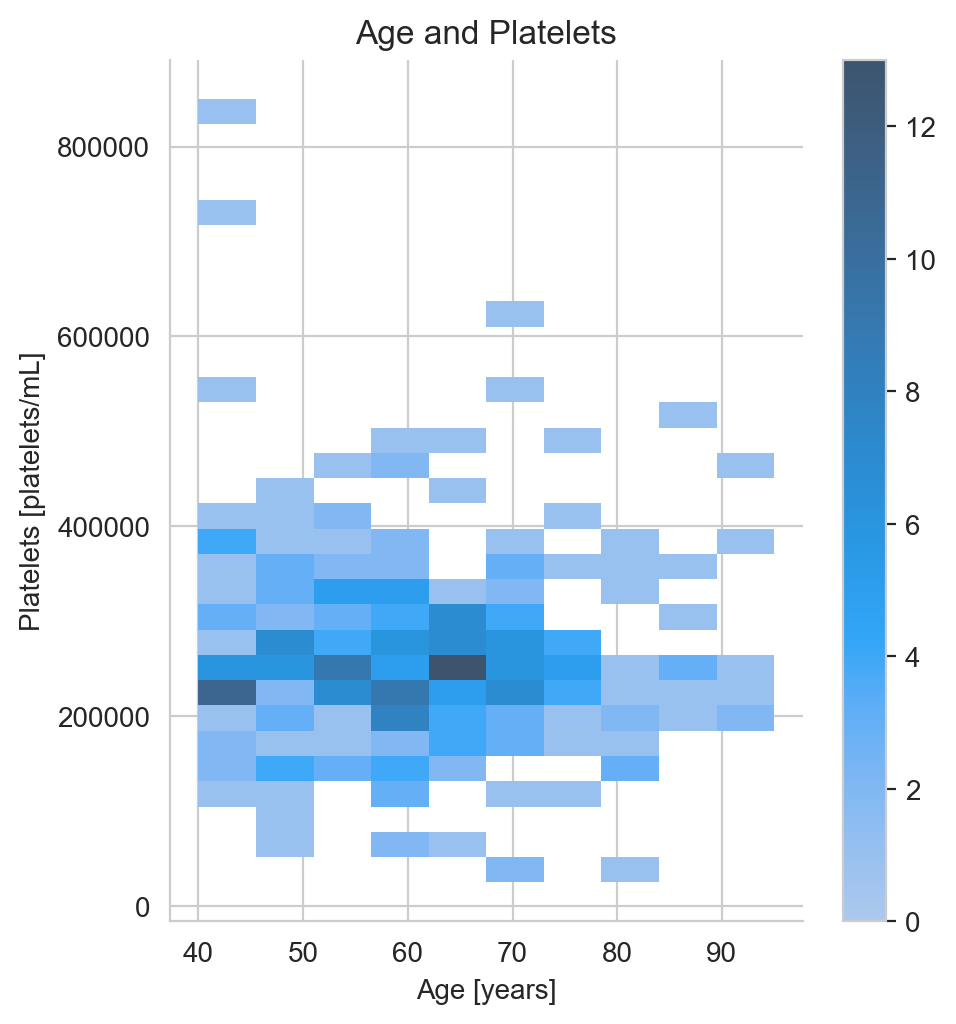

In [18]:
seaborn.displot(
    df,
    x='age',
    y='platelets',
    cbar=True
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
);

A kernel density estimate adds smoothing to produce _heat areas_. The `kind` argument in addd to the figure below and is set it to `'kde'`. A rug plot is also created (tick marks along the axes for each observation) using the `rug` argument with a value of `True`.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


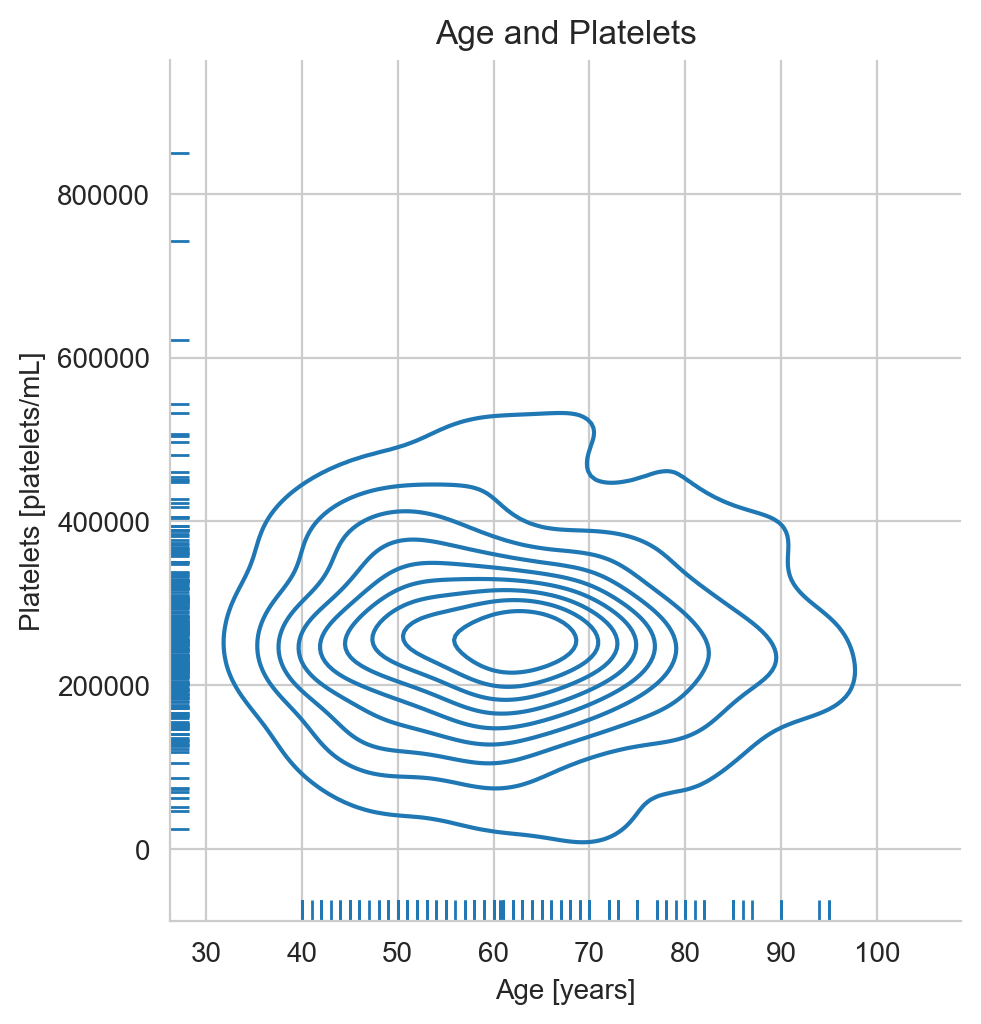

In [19]:
seaborn.displot(
    df,
    x='age',
    y='platelets',
    kind='kde',
    rug=True
).set(
    title='Age and Platelets',
    xlabel='Age [years]',
    ylabel='Platelets [platelets/mL]'
);

The `jointplot` function can combine different visualizations of the same data, by adding plots in the margins of the plot figure. The default in the figure below, adds a histogram to a scatter plot given two continuous variables.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


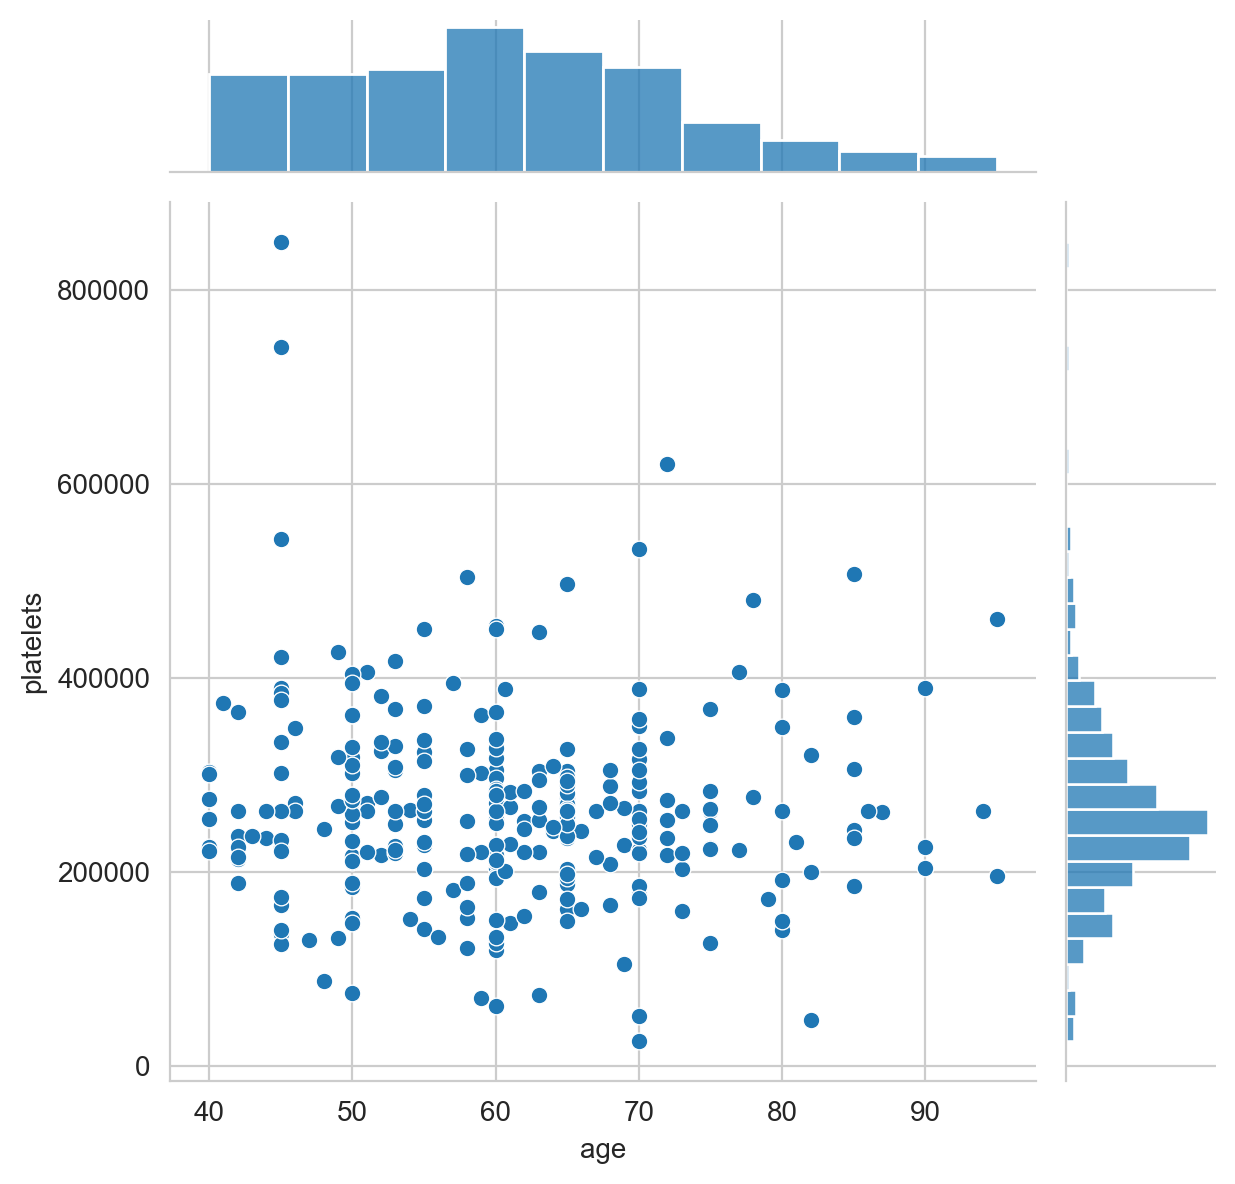

In [20]:
seaborn.jointplot(
    df,
    x='age',
    y='platelets'
);

By creating a JointGrid object and adding the `plot_joint` and `plot_matginals` methods to the JointGrid object, diffent main plots and marginal plots can be created. In the figure below, box-and-whisker plots are added to the margin of a heat map.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


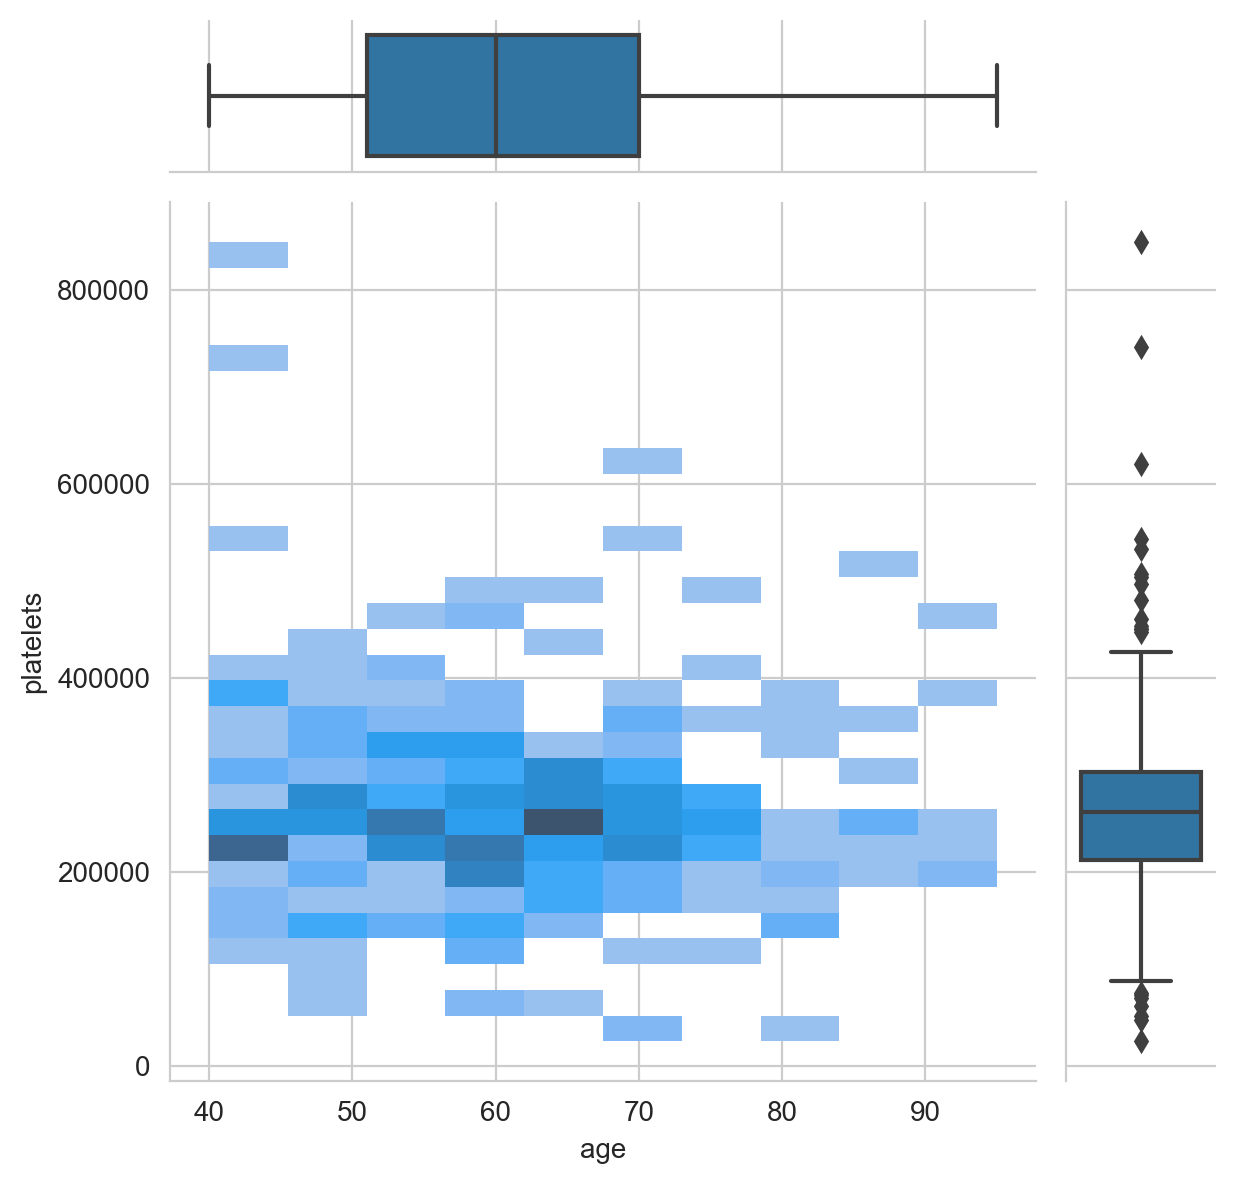

In [21]:
g = seaborn.JointGrid(
    data=df,
    x='age',
    y='platelets'
)
g.plot_joint(seaborn.histplot)
g.plot_marginals(seaborn.boxplot);

## <span style="color:#0096FF">Categorical plots</span>

Although box-and-whisker plots visualize the distribution of a continuous variable, seaborn lists it as plot for categorical data. It is used to compare the distribution of a continuous numerical variable between the unique elements of a categorical variable. The `catplot` function is used for a variety of plots for categorical data.

In the figure below, a box-and-whisker plot of the `age` variable is created, for those with and without diabetes (unique elements in the `diabetes` variable). The `kind` argument is set to `'box'`, to indicate a box-and-whisker plot.

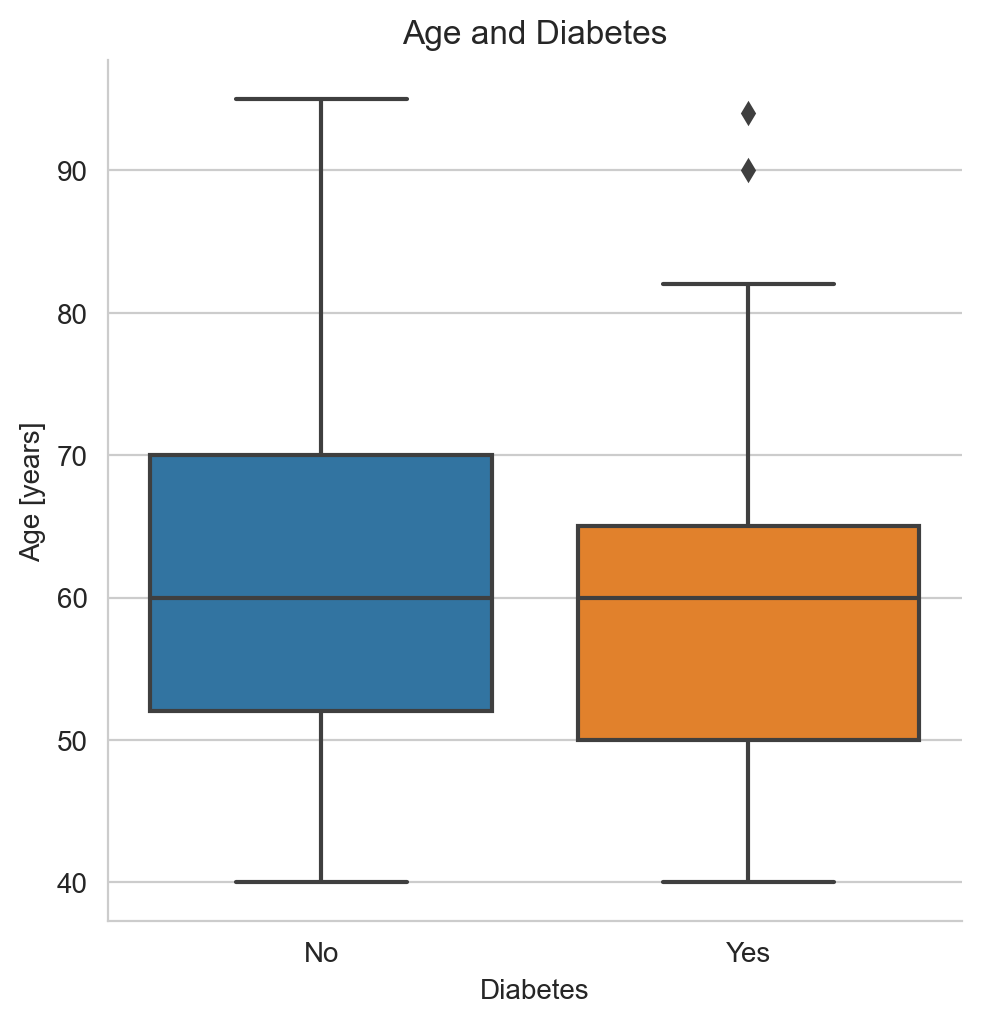

In [22]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    kind='box'
).set(
    title='Age and Diabetes',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

In the figure below, a second categorical variable, `death` is added, using the `hue` argument.

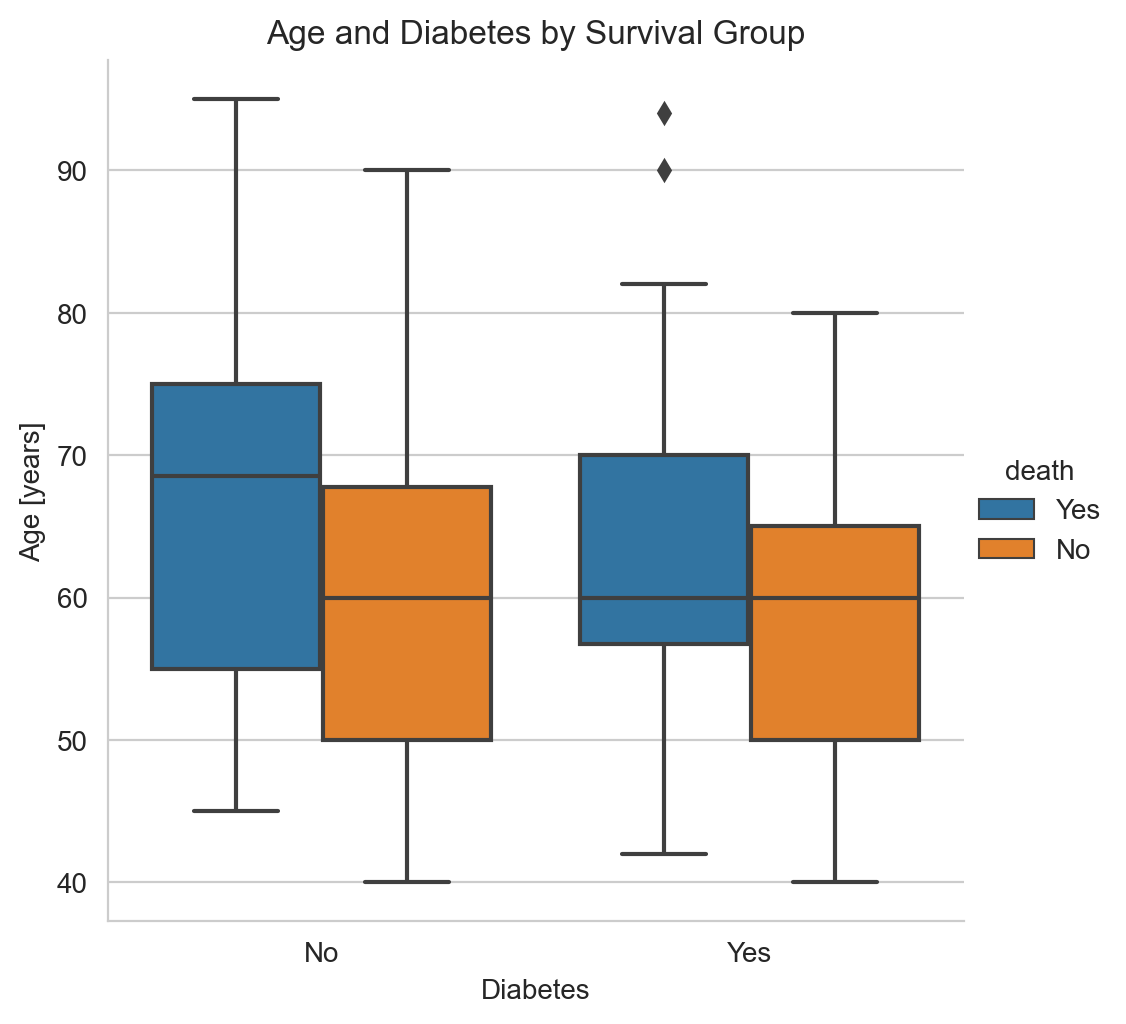

In [23]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='box'
).set(
    title='Age and Diabetes by Survival Group',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

For larger data sets, the `'boxen'` value for the `kind` argument, gives a better indication of the distribution of the values of the continuous variable. In the figure below, the same data is visualized, setting the `kind` argument to `'boxen'`.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/se

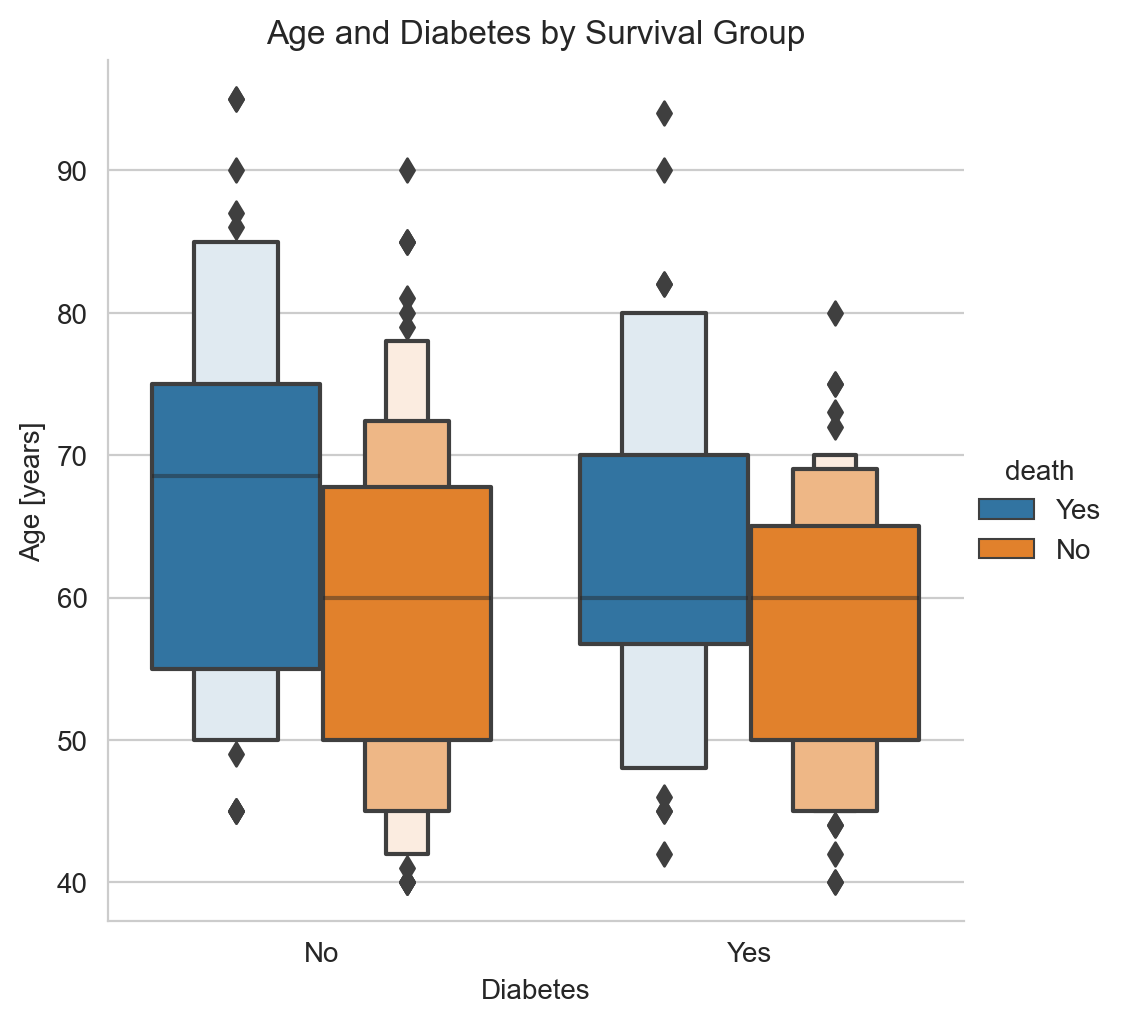

In [24]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='boxen'
).set(
    title='Age and Diabetes by Survival Group',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

Violin plots use a kernel density estimate to create the shape of the plots. This gives an even richer visualization of the distribution of the continuous variable. In the figure below, the plot above is revisited, but as a violin plot, setting the `kind` argument to `'violin'`.

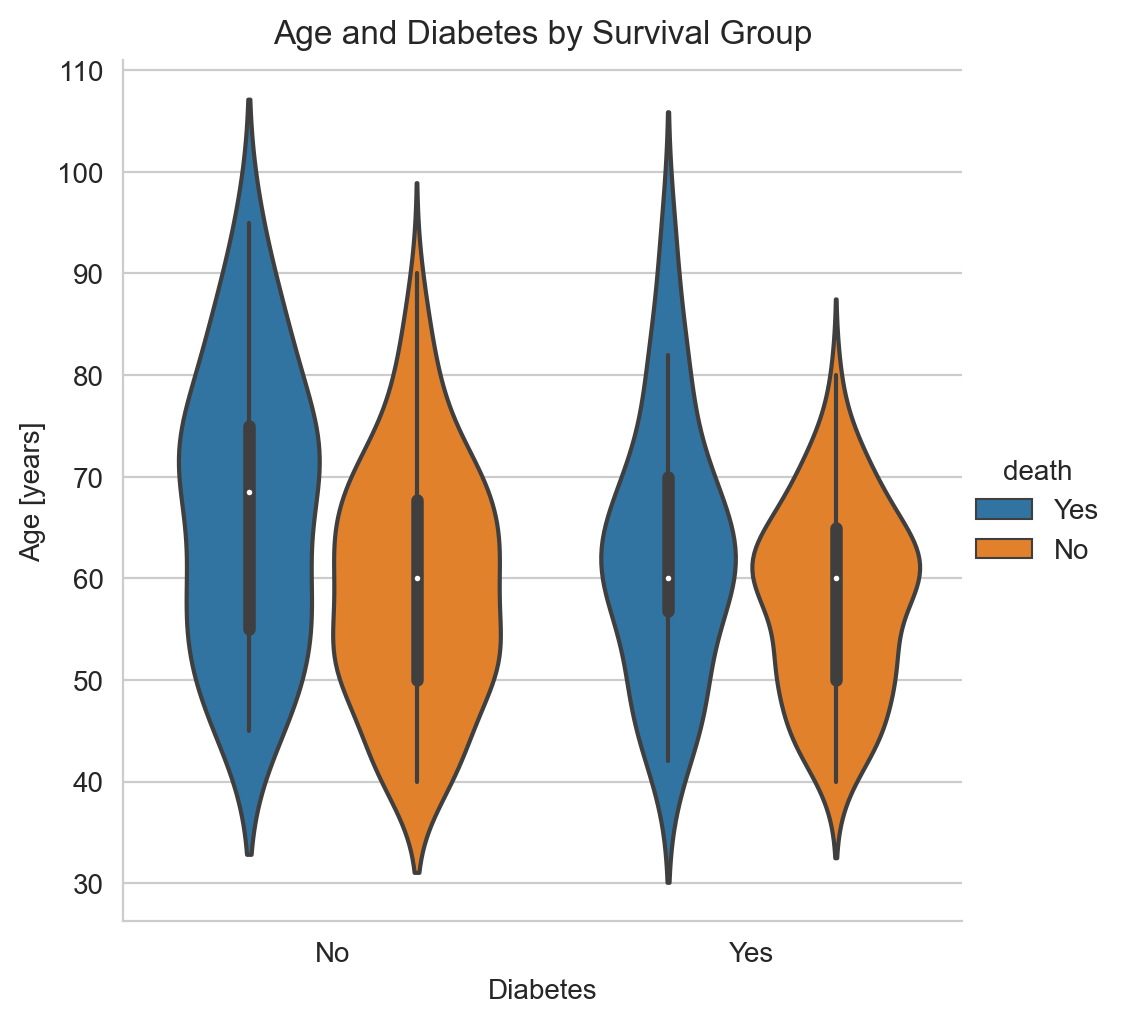

In [25]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='violin'
).set(
    title='Age and Diabetes by Survival Group',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

To reduce the number of shapes, the violin plots can be _split_ by the unique values of a binary variable such as `death`, using the `split` argument. This is shown in the figure below.

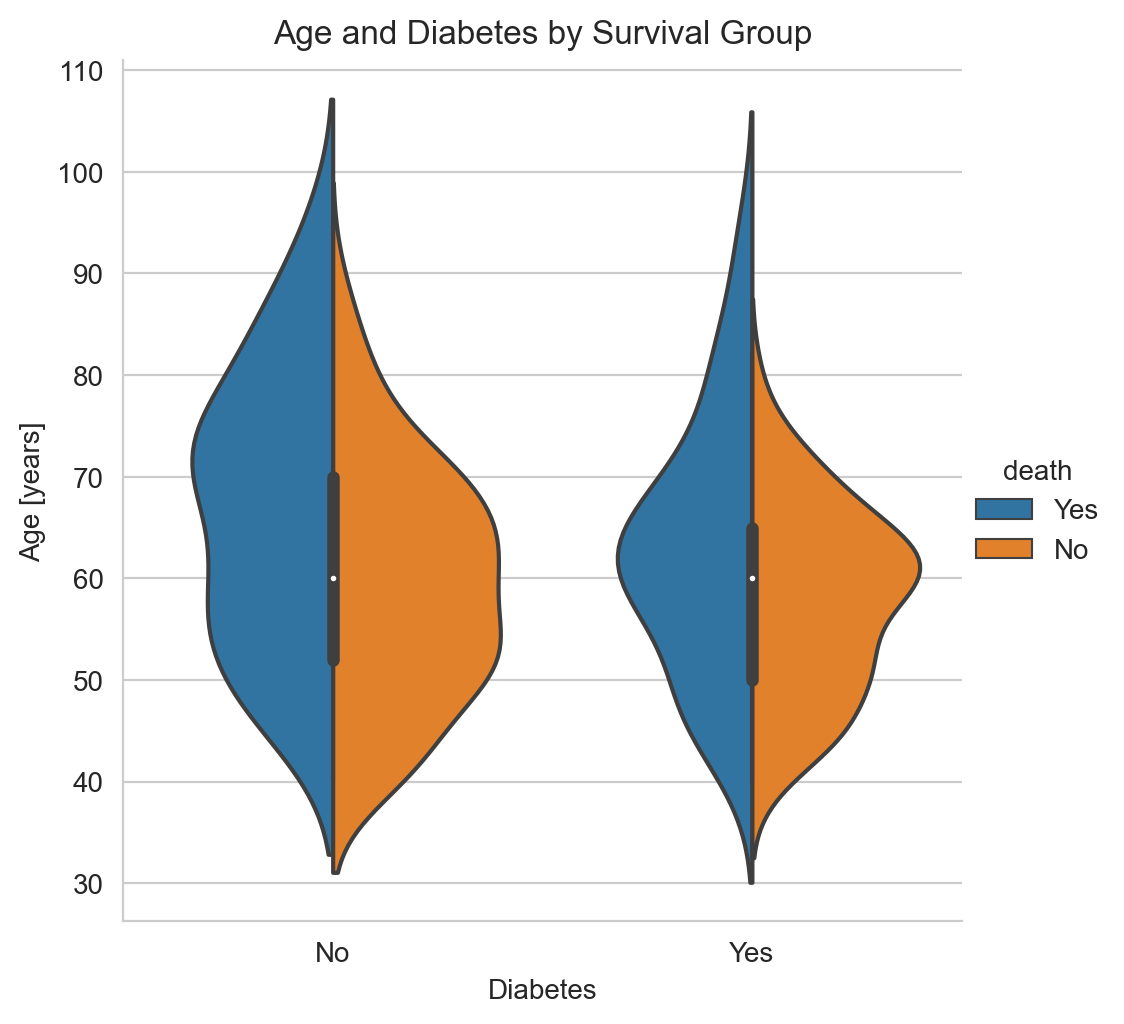

In [26]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='violin',
    split=True
).set(
    title='Age and Diabetes by Survival Group',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

A number of other visualizations can be created using `catplot`. In the figure below, a swarm plot is generated, which is a type of categorical scatter plot. The `kind` argument is set to `'swarm'`.

/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juanklopper/opt/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


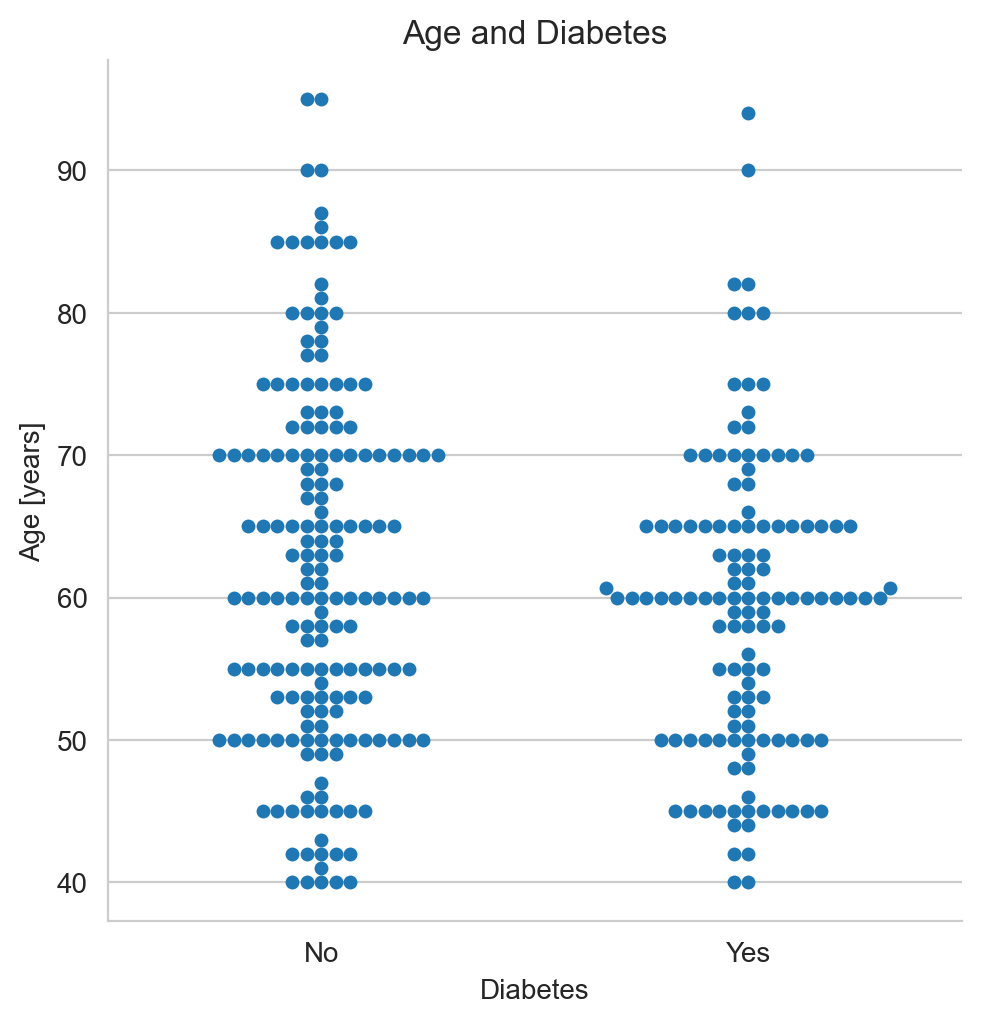

In [27]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    kind='swarm'
).set(
    title='Age and Diabetes',
    xlabel='Diabetes',
    ylabel='Age [years]'
);

Bar plots are quintessential plots for categorical data, showing the frequency of the unique elements of a categorical variable. In the figure below, the frequency of those with and without diabetes is visualized. This is achieved by setting the `kind` argument to `'count'`.

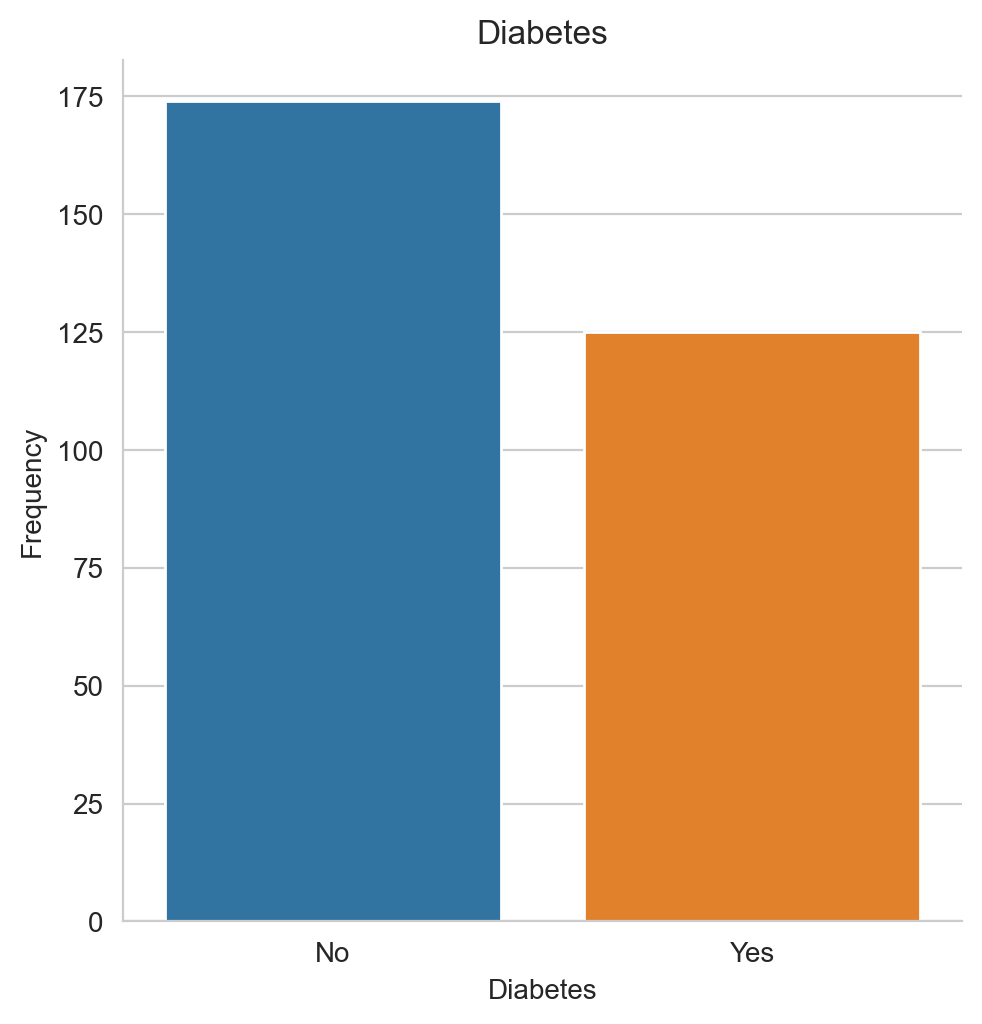

In [28]:
seaborn.catplot(
    data=df,
    x='diabetes',
    kind='count'
).set(
    title='Diabetes',
    xlabel='Diabetes',
    ylabel='Frequency'
);

<span style="color:#00FF00">Task</span>

Another categorical variable can be added using the `hue` argument and setting a categorical variable as argument. Create a bar plot using the `diabetes` variable as in the figure above, but add the `death` variable as well.

<span style="color:#00FF00">Solution</span>

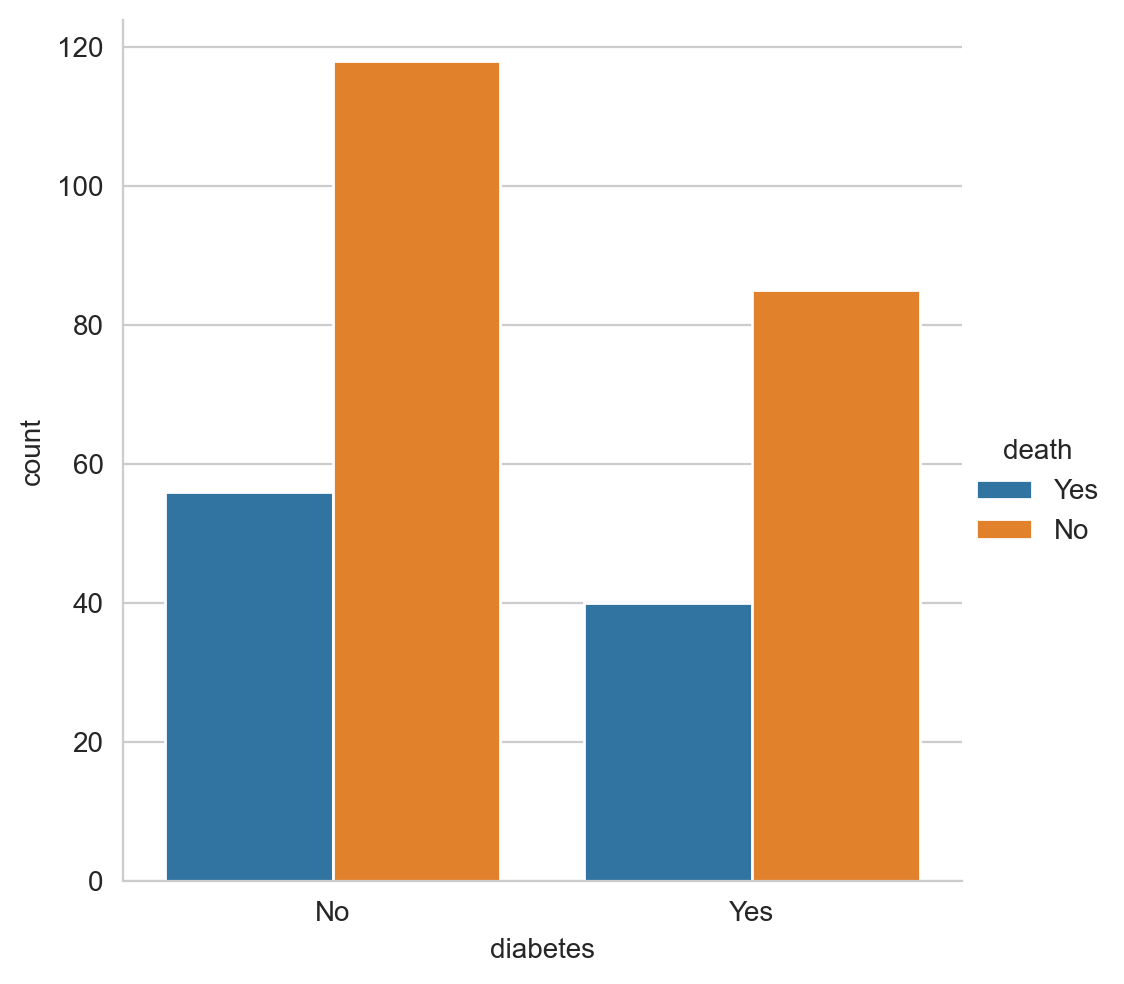

In [29]:
seaborn.catplot(
    data=df,
    x='diabetes',
    hue='death',
    kind='count'
);

The last type of categorical plot considered here, is the point plot. It visualizes the difference in the mean of a numerical variable for the unique elements of a categorical variable. A point plot also shows the $95\%$ confidence interval around the mean. The `hue` argument is used to show individual point plots. In the figure below, the difference in the `age` variable between those with and without diabetes, for each of the survivors and non-survivors, is demonstrated. The two categorical variables being `diabetes` and `death`.

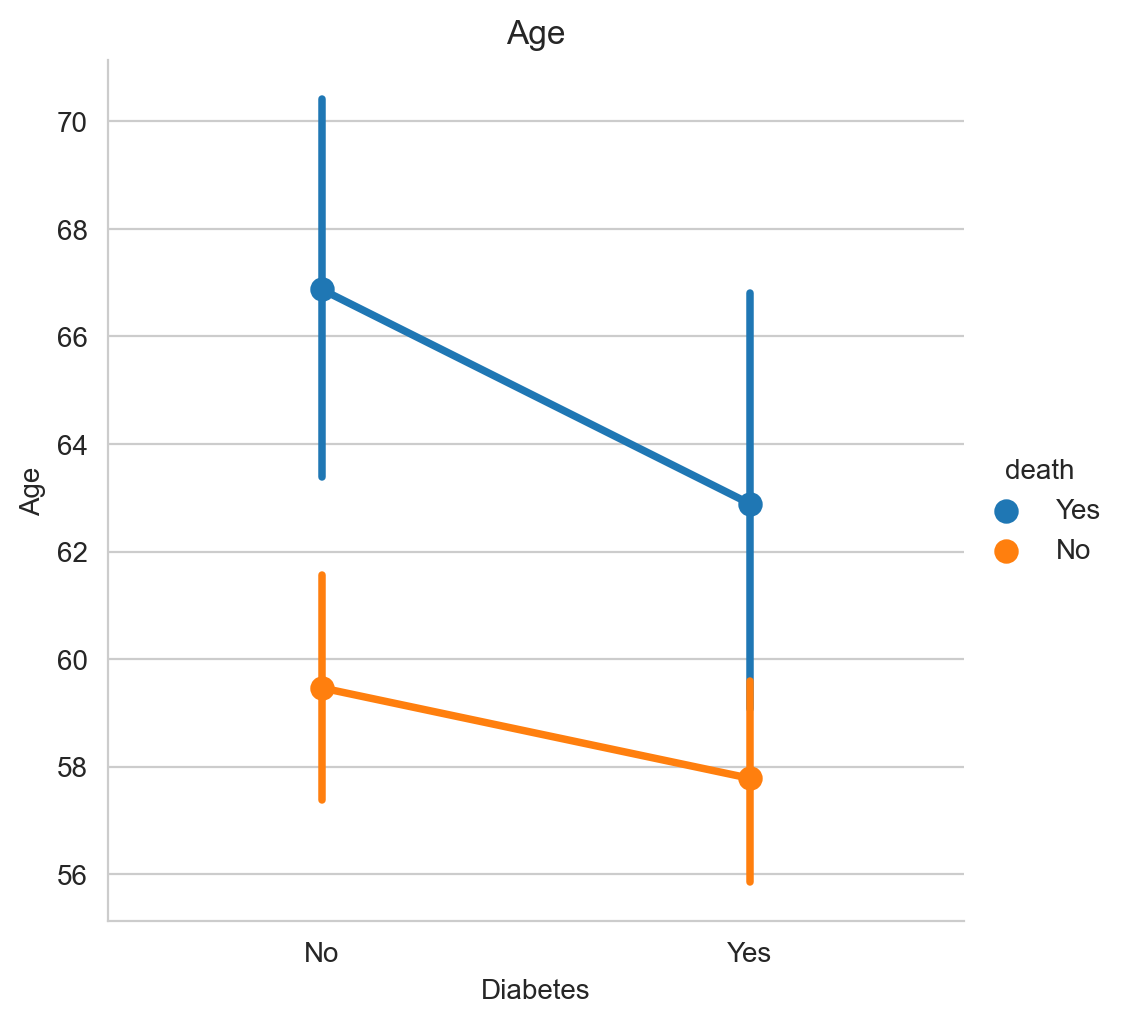

In [30]:
seaborn.catplot(
    data=df,
    x='diabetes',
    y='age',
    hue='death',
    kind='point'
).set(
    title='Age',
    xlabel='Diabetes',
    ylabel='Age'
);

# <span style="color:#0096FF">Quiz questions</span>

### <span style="color:#FFD700">Questions</span>

Use the [online documentation](https://seaborn.pydata.org) for the seaborn package to answer the following questions.

1. How do you import the Seaborn package in Python?

2. How do you create a scatter plot in Seaborn for variables `x` and `y` in a DataFrame `df`?

3. How do you create a line plot in Seaborn for variables `x` and `y` in a DataFrame `df`?

4. How do you create a histogram in Seaborn for a variable `x` in a DataFrame `df`?

5. How do you create a stacked histogram in Seaborn for variables `x` and 'hue' `y` in a DataFrame `df`?

6. How do you create a heatmap in Seaborn for a variable `x` and `y` in a DataFrame `df`?

7. How do you create a box plot in Seaborn for variables `x` and `y` in a DataFrame `df`?

8. How do you create a violin plot in Seaborn for variables `x` and `y` in a DataFrame `df`?

9. How do you create a bar plot in Seaborn for variables `x` and `y` in a DataFrame `df`?

10. How do you add a title to a Seaborn plot assigned to the variable `ax` with the title 'My Title'?

11. How do you save a Seaborn plot `ax` to a file named 'output.png'?

12. How do you set the `x` and `y` axis labels to 'X Label' and 'Y Label' respectively for a Seaborn plot `ax`?

13. How do you change the color palette of a Seaborn plot to 'Blues'?

14. How do you display a Seaborn plot with a logarithmic scale on the y-axis?

15. How do you add a regression line to a scatter plot in Seaborn for variables `x` and `y` in a DataFrame `df`?